In [21]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Read the uploaded Excel file into a DataFrame
file_path = 'project_final_data.xlsx'
df = pd.read_excel(file_path)

# Display the columns and their data types to identify unnamed columns
print(df.dtypes)


# Clean the data: remove rows with NaN values and unnecessary columns
df_cleaned = df.dropna(subset=['Ozone (ppm)', 'PM 2.5 (ug/m3)', 'Temperature', 'Relative Humidity', 'AQI'])
df_cleaned = df_cleaned[['Ozone (ppm)', 'PM 2.5 (ug/m3)', 'Temperature', 'Relative Humidity', 'AQI']]

# Splitting the data into training and testing sets (e.g., 80% training, 20% testing)
X = df_cleaned[['Ozone (ppm)', 'PM 2.5 (ug/m3)', 'Temperature', 'Relative Humidity']]
y = df_cleaned['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for intercept to training data
X_train = sm.add_constant(X_train)

# Fit the model using training data
model = sm.OLS(y_train, X_train).fit()

# Add constant for intercept to testing data
X_test = sm.add_constant(X_test)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Getting R-squared on testing data
SS_Residual = ((y_test - y_pred) ** 2).sum()
SS_Total = ((y_test - y_test.mean()) ** 2).sum()
r_squared_test = 1 - (float(SS_Residual)) / SS_Total
print(f"R-squared on testing data: {r_squared_test}")

# Coefficient table
print("\nCoefficient table:")
print(model.summary())


Interval Start             object
Interval End               object
Carbon Monoxide (ppm)     float64
Nitrogen Dioxide (ppm)    float64
Unnamed: 4                float64
Ozone (ppm)               float64
Unnamed: 6                float64
PM 2.5 (ug/m3)            float64
Unnamed: 8                float64
Unnamed: 9                float64
Temperature               float64
Relative Humidity           int64
AQI                       float64
dtype: object
R-squared on testing data: 0.04475557166778965

Coefficient table:
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     44.61
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           5.07e-37
Time:                        20:03:57   Log-Likelihood:                -19738.
No.

In [22]:
# Select the columns for correlation analysis
selected_columns = ['Carbon Monoxide (ppm)', 'Nitrogen Dioxide (ppm)', 'Ozone (ppm)',
                    'PM 2.5 (ug/m3)', 'Temperature', 'Relative Humidity']

# Create a subset of the DataFrame with selected columns
df_subset = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        Carbon Monoxide (ppm)  Nitrogen Dioxide (ppm)  \
Carbon Monoxide (ppm)                1.000000                0.351456   
Nitrogen Dioxide (ppm)               0.351456                1.000000   
Ozone (ppm)                         -0.355422               -0.760045   
PM 2.5 (ug/m3)                       0.791994                0.070248   
Temperature                          0.030922               -0.527044   
Relative Humidity                    0.243748                0.297149   

                        Ozone (ppm)  PM 2.5 (ug/m3)  Temperature  \
Carbon Monoxide (ppm)     -0.355422        0.791994     0.030922   
Nitrogen Dioxide (ppm)    -0.760045        0.070248    -0.527044   
Ozone (ppm)                1.000000       -0.132616     0.522988   
PM 2.5 (ug/m3)            -0.132616        1.000000     0.096199   
Temperature                0.522988        0.096199     1.000000   
Relative Humidity         -0.598914        0.146801    -0.47

In [23]:
# Select specific columns
selected_columns = ['Ozone (ppm)', 'PM 2.5 (ug/m3)', 'Temperature', 'Relative Humidity', 'AQI']
selected_data = df[selected_columns]

# Display summary statistics for selected columns
summary_stats = selected_data.describe()

# Calculate median for selected columns
median = selected_data.median()

# Calculate quartiles and IQR for selected columns
Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1

# Combine summary statistics, median, Q1, Q3, and IQR into a single DataFrame
summary_statistics = pd.concat([summary_stats, median, Q1, Q3, IQR], axis=1)

print(summary_statistics)


                   Ozone (ppm)  PM 2.5 (ug/m3)  Temperature  \
count              8344.000000     8745.000000  8760.000000   
mean                  0.024833       10.262035     5.529224   
std                   0.012870       16.868053    13.420465   
min                   0.000000        0.500000   -32.600000   
25%                   0.016000        4.400000    -1.400000   
50%                   0.025000        6.400000     6.200000   
75%                   0.034000       10.400000    15.300000   
max                   0.080000      353.800000    36.600000   
Ozone (ppm)                NaN             NaN          NaN   
PM 2.5 (ug/m3)             NaN             NaN          NaN   
Temperature                NaN             NaN          NaN   
Relative Humidity          NaN             NaN          NaN   
AQI                        NaN             NaN          NaN   

                   Relative Humidity          AQI          0       0.25  \
count                    8760.000000  8760

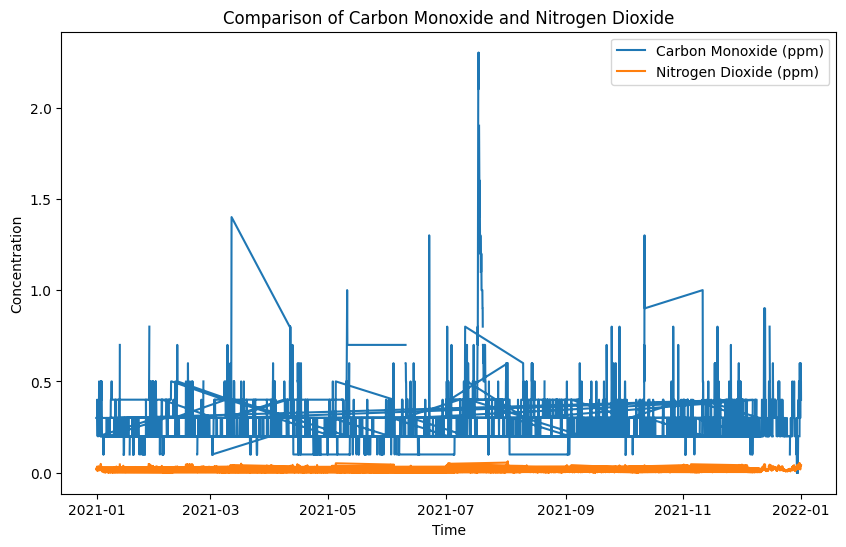

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Interval Start' column to datetime format
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

plt.figure(figsize=(10, 6))

plt.plot(df['Interval Start'], df['Carbon Monoxide (ppm)'], label='Carbon Monoxide (ppm)')
plt.plot(df['Interval Start'], df['Nitrogen Dioxide (ppm)'], label='Nitrogen Dioxide (ppm)')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Comparison of Carbon Monoxide and Nitrogen Dioxide')
plt.legend()
plt.show()


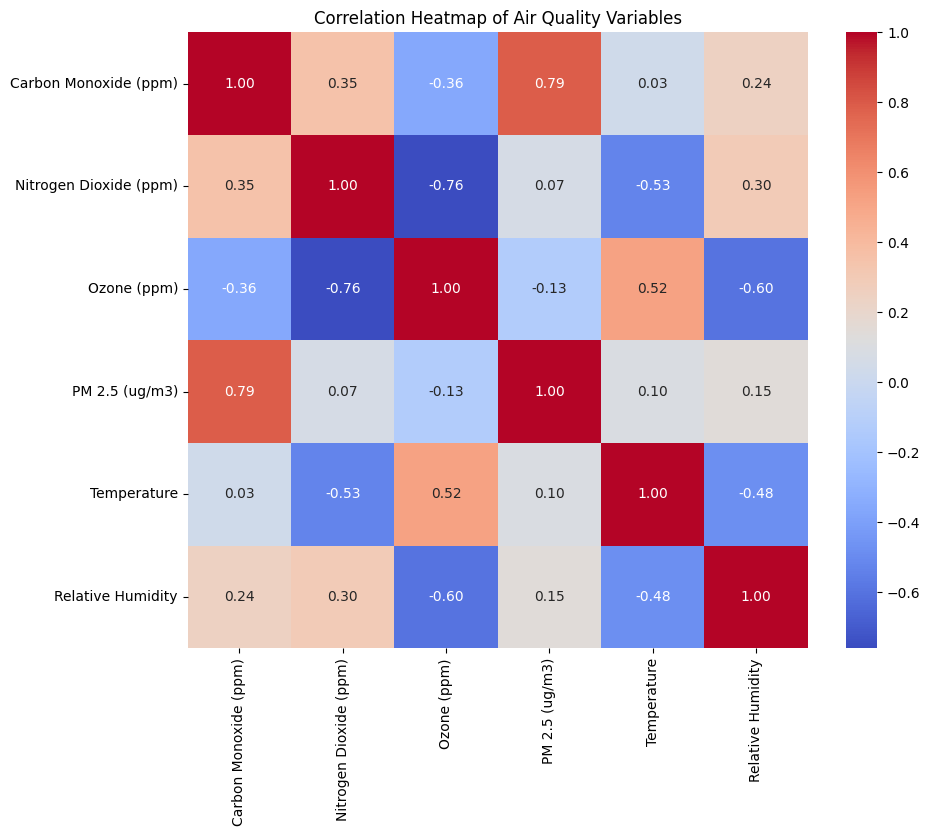

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the columns of interest
selected_columns = ['Carbon Monoxide (ppm)', 'Nitrogen Dioxide (ppm)', 'Ozone (ppm)', 'PM 2.5 (ug/m3)', 'Temperature', 'Relative Humidity']

# Subsetting the DataFrame with the selected columns
selected_data = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Air Quality Variables')
plt.show()

In [26]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Read the uploaded Excel file into a DataFrame
file_path = 'project_final_data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Clean the data: remove rows with NaN values and unnecessary columns
df_cleaned = df.dropna(subset=['Carbon Monoxide (ppm)', 'Nitrogen Dioxide (ppm)', 'PM 2.5 (ug/m3)'])
df_cleaned = df_cleaned[['Carbon Monoxide (ppm)', 'Nitrogen Dioxide (ppm)', 'PM 2.5 (ug/m3)']]

# Splitting the data into training and testing sets (e.g., 80% training, 20% testing)
X = df_cleaned[['Carbon Monoxide (ppm)', 'PM 2.5 (ug/m3)']]  # Independent variables
y = df_cleaned['Nitrogen Dioxide (ppm)']  # Dependent variable to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for intercept to training data
X_train = sm.add_constant(X_train)

# Fit the model using training data
model = sm.OLS(y_train, X_train).fit()

# Add constant for intercept to testing data
X_test = sm.add_constant(X_test)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Getting R-squared on testing data
SS_Residual = ((y_test - y_pred) ** 2).sum()
SS_Total = ((y_test - y_test.mean()) ** 2).sum()
r_squared_test = 1 - (float(SS_Residual)) / SS_Total
print(f"R-squared on testing data: {r_squared_test}")

# Coefficient table
print("\nCoefficient table:")
print(model.summary())


R-squared on testing data: 0.26137682294831455

Coefficient table:
                              OLS Regression Results                              
Dep. Variable:     Nitrogen Dioxide (ppm)   R-squared:                       0.235
Model:                                OLS   Adj. R-squared:                  0.235
Method:                     Least Squares   F-statistic:                     1021.
Date:                    Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                            20:04:29   Log-Likelihood:                 22188.
No. Observations:                    6643   AIC:                        -4.437e+04
Df Residuals:                        6640   BIC:                        -4.435e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------

       Carbon Monoxide (ppm)  Nitrogen Dioxide (ppm)   Unnamed: 4  \
count            8335.000000             8320.000000  8760.000000   
mean                0.267475                0.012361     0.014847   
std                 0.143674                0.009848     0.004463   
min                 0.000000                0.000900     0.010793   
25%                 0.200000                0.004700     0.011371   
50%                 0.200000                0.009200     0.012738   
75%                 0.300000                0.017200     0.017903   
max                 2.300000                0.062500     0.041600   

       Ozone (ppm)   Unnamed: 6  PM 2.5 (ug/m3)   Unnamed: 8   Unnamed: 9  \
count  8344.000000  8760.000000     8745.000000  1573.000000  8760.000000   
mean      0.024833     0.024625       10.262035     8.726372    10.251053   
std       0.012870     0.011505       16.868053     8.190371     1.488692   
min       0.000000     0.000000        0.500000     1.550000     7.572

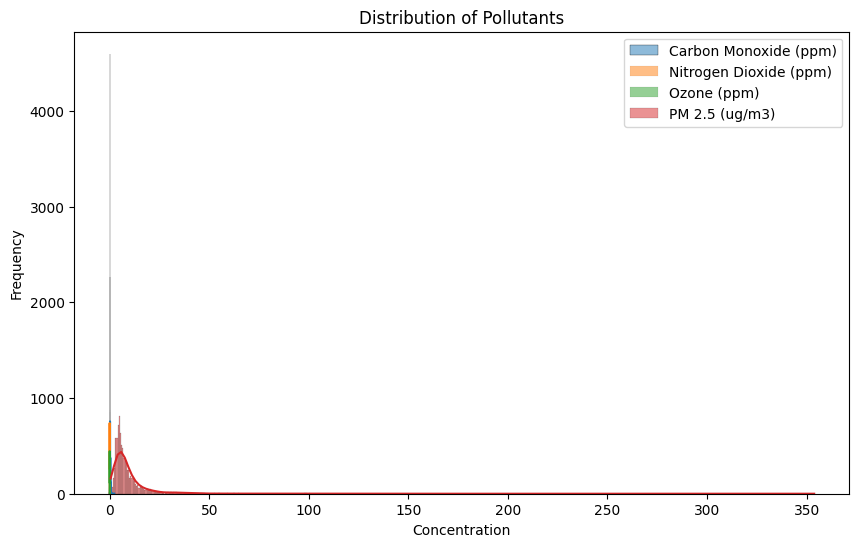

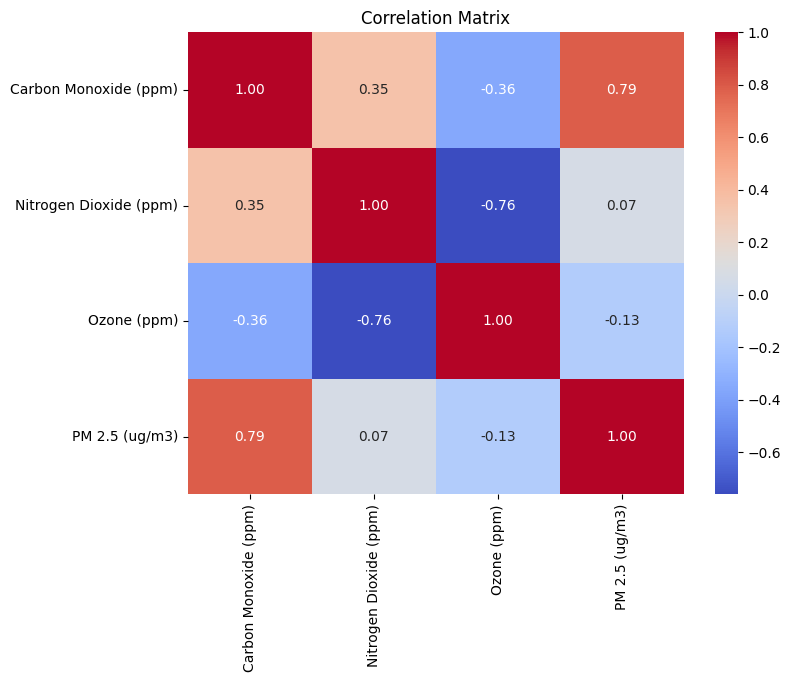

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Distribution of pollutants
pollutants = ['Carbon Monoxide (ppm)', 'Nitrogen Dioxide (ppm)', 'Ozone (ppm)', 'PM 2.5 (ug/m3)']
plt.figure(figsize=(10, 6))
for pollutant in pollutants:
    sns.histplot(df[pollutant], kde=True, label=pollutant)
plt.legend()
plt.title('Distribution of Pollutants')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
correlation_matrix = df[['Carbon Monoxide (ppm)', 'Nitrogen Dioxide (ppm)', 'Ozone (ppm)', 'PM 2.5 (ug/m3)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
